In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
### Initial Laser Measurements 
distances = [0.5,1.131,1.312,2.26,3.26,4.26,5.26,6.26,7.26,8.26] #m
distances = np.array(distances)
del_dist = 0.005 # 0.5 cm uncertainty in distances
beam_diam_cm = [1.5,2.5,3,5,6.5,8.5,11,12.5,14.5,16.5] #cm
beam_diam = np.array(beam_diam_cm) * 10**(-2) #m
del_beam_diam = 0.0005 #0.5 mm uncertainty in beam measurement
'''
NOTE: Beam Diameter was measured on an unstable surface which has difficult to keep level, there is a
greater incalculable uncertainty related to these measurements which could not be avoided since we could
not find a better surface to use.
'''
d_0 = 0.0015 #m

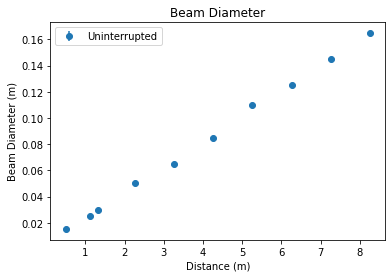

In [12]:
## Plot
plt.errorbar(distances, beam_diam, label="Uninterrupted",yerr = del_beam_diam, fmt = 'o')
plt.xlabel("Distance (m)")
plt.ylabel("Beam Diameter (m)")
plt.title("Beam Diameter")
plt.legend()
plt.savefig("uninterrupted_diam.png")

Divergence is given by 
$$
d^2(z) = d_0^2+\theta^2z^2
$$
Thus, we solve to find $\theta$ 
$$
\theta  = \sqrt{\frac{d^2-d_0^2}{z^2}}
$$

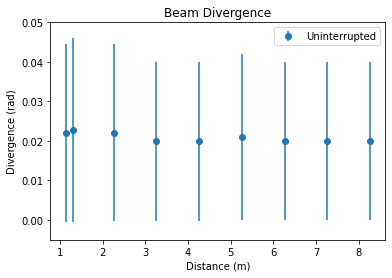

In [15]:
theta  = np.sqrt((beam_diam**2 - d_0**2)/distances**2)
del_theta = np.sqrt( ( ( beam_diam+del_beam_diam)**2 - (d_0 +del_beam_diam)**2) / (distances-del_dist)**2)
#HERE WE NEED TO CALCULATE THETA UNCERTAINTY USING dtheta = sqrt((df/ddist ^2 + df/ddiam^2)) 
#Just partial differentiation for each variable with uncertainty and add. 

plt.errorbar(distances[1:], theta[1:], label="Uninterrupted",yerr = del_theta[1:], fmt = 'o')
plt.ylim([-0.005, 0.05])
plt.xlabel("Distance (m)")
plt.ylabel("Divergence (rad)")
plt.title("Beam Divergence")
plt.legend()

We created a Galilean Beam Expander, using a -25mm focal length lens and a 200mm focal length lens. 


In [6]:
distances2_cm = [176.6,324.92,424.92,524.92,624.92,724.92,824.92,924.92,1024.92] #cm
distances2 = np.array(distances2_cm)*0.01

#25 in between two mirrors, 113.1 cm to first mirror , 53in +13.7cm to end of table
#Beam 2 and 3 were measured at the same distances

beam2_diam_cm = [2.36,1.95,1.80,1.70,1.60,1.50,1.50,1.40,1.35] #cm
del_beam2_diam = 0.0005 #m
beam2_diam = np.array(beam2_diam_cm) * 0.01 #m
print(distances2, beam2_diam)

beam3_diam_cm = [2.40,3.25,3.8,4.4,4.83,5.52,6.13,6.75,7.46] #cm
del_beam3_diam = 0.0005 #m
beam3_diam = np.array(beam3_diam_cm) * 0.01 #m

d_0 = [beam_diam[0],beam2_diam[0],beam3_diam[0]]

[ 1.766   3.2492  4.2492  5.2492  6.2492  7.2492  8.2492  9.2492 10.2492] [0.0236 0.0195 0.018  0.017  0.016  0.015  0.015  0.014  0.0135]


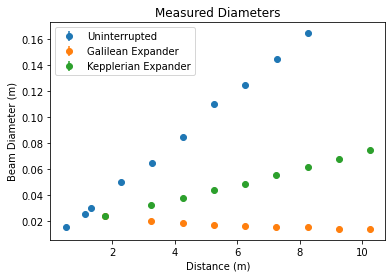

In [7]:
plt.errorbar(distances, beam_diam, label="Uninterrupted",yerr = del_beam_diam, fmt = 'o')
plt.errorbar(distances2, beam2_diam, label = "Galilean Expander", yerr=del_beam2_diam, fmt = 'o')
plt.errorbar(distances2, beam3_diam, label = "Kepplerian Expander", yerr=del_beam3_diam, fmt = 'o')
plt.xlabel("Distance (m)")
plt.ylabel("Beam Diameter (m)")
plt.title("Measured Diameters")
plt.legend()
plt.show()

Now we want to take the divergence of all 3 and compare them

[0.017793043636386497, 0.002471395879121226, 0.006090963278183793]
[0.01793379665281957, 0.0025044403969400864, 0.006137059110752199]


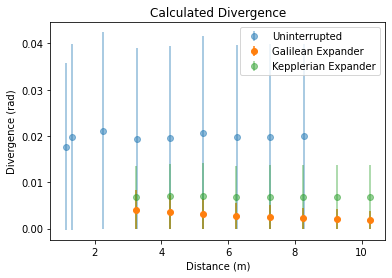

In [8]:

theta  = np.sqrt((beam_diam**2 - d_0[0]**2)/distances**2)
theta2 = np.sqrt(np.abs((beam2_diam**2 - d_0[1]**2)/distances2**2))
theta3 = np.sqrt((beam3_diam**2 - d_0[2]**2)/distances2**2)

theta_avs = [np.sum(theta)/len(theta),np.sum(theta2)/len(theta2),np.sum(theta3)/len(theta3)]



del_theta = np.sqrt( ( ( beam_diam+del_beam_diam)**2 - (d_0[0] +del_beam_diam)**2) / (distances-del_dist)**2)
del_theta2 = np.sqrt( np.abs( ( beam2_diam+del_beam2_diam)**2 - (d_0[1] +del_beam_diam)**2) / (distances2-del_dist)**2)
del_theta3 = np.sqrt( ( ( beam3_diam+del_beam3_diam)**2 - (d_0[2] +del_beam_diam)**2) / (distances2-del_dist)**2)

del_theta_avs = [np.sum(del_theta)/len(del_theta),np.sum(del_theta2)/len(del_theta2),np.sum(del_theta3)/len(del_theta3)]


print(theta_avs)
print(del_theta_avs)


plt.errorbar(distances[1:], theta[1:], label="Uninterrupted",yerr = del_theta[1:], fmt = 'o', alpha =0.5)
plt.errorbar(distances2[1:], theta2[1:], label="Galilean Expander",yerr = del_theta2[1:], fmt = 'o', alpha = 1)
plt.errorbar(distances2[1:], theta3[1:], label="Kepplerian Expander",yerr = del_theta3[1:], fmt = 'o', alpha = 0.5)
plt.xlabel("Distance (m)")
plt.ylabel("Divergence (rad)")
plt.title("Calculated Divergence")
plt.legend()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 9
    # variables        = 2
    chi-square         = 2.8843e-05
    reduced chi-square = 4.1205e-06
    Akaike info crit   = -109.857659
    Bayesian info crit = -109.463209
    R-squared          = 0.99858186
[[Variables]]
    slope:  0.01950469 +/- 2.7782e-04 (1.42%) (init = 1)
    b:      0.00379861 +/- 0.00138808 (36.54%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, b) = -0.8731
--------------------------------------
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 1.1607e-06
    reduced chi-square = 1.9345e-07
    Akaike info crit   = -121.967332
    Bayesian info crit = -121.808449
    R-squared          = 0.96065375
[[Variables]]
    slope: -8.2143e-04 +/- 6.7868e-05 (8.26%) (init = 1)
    b:      0.02154399 +/- 4.8373e-04 (2.25%) (ini

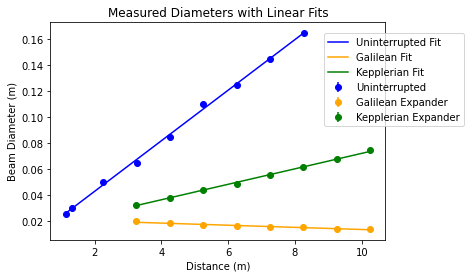

In [9]:
import PhysicsFunctions as phy

theta_fit,_ = phy.fitLinear(distances[1:],beam_diam[1:])
print("--------------------------------------")
theta2_fit,_ = phy.fitLinear(distances2[1:],beam2_diam[1:])
print("--------------------------------------")
theta3_fit,_ = phy.fitLinear(distances2[1:],beam3_diam[1:],6)
print("--------------------------------------")

plt.errorbar(distances[1:], beam_diam[1:], label="Uninterrupted",yerr = del_beam_diam, fmt = 'o', color="blue")
plt.plot(distances[1:],theta_fit,label = "Uninterrupted Fit", color = "blue")
plt.errorbar(distances2[1:], beam2_diam[1:], label="Galilean Expander",yerr = del_beam_diam, fmt = 'o', color="orange")
plt.plot(distances2[1:],theta2_fit,label = "Galilean Fit", color ="orange")
plt.errorbar(distances2[1:], beam3_diam[1:], label="Kepplerian Expander",yerr = del_beam_diam, fmt = 'o',color ="green")
plt.plot(distances2[1:],theta3_fit,label = "Kepplerian Fit",color = "green")
plt.xlabel("Distance (m)")
plt.ylabel("Beam Diameter (m)")
plt.title("Measured Diameters with Linear Fits")
plt.legend(bbox_to_anchor = (1.25, 0.5), loc='lower right')

In [25]:
fit_theta = np.sqrt(0.01950469)
fit_theta2 = np.sqrt(8.2143e-04)
fit_theta3 = np.sqrt(0.00596429)
fit_thetas = [fit_theta,fit_theta2,fit_theta3]
del_fit = np.sqrt(2.7782e-04)
del_fit2 = np.sqrt(6.7868e-05)
del_fit3 = np.sqrt(1.2570e-04)


print("{:.6f} \pm {:.6f} {:.6f} \pm {:.6f} {:.6f} \pm {:.6f}".format(fit_theta, del_fit,fit_theta2, del_fit2,fit_theta3, del_fit3))

print(np.array(fit_thetas) - np.array(theta_avs))

0.139659 \pm 0.016668 0.028661 \pm 0.008238 0.077229 \pm 0.011212
[0.12186615 0.0261892  0.07113785]
